<a href="https://colab.research.google.com/github/Amirbn73/Insurance_Medical_Cost_Prediction/blob/main/Insurance_Cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

---

In this Task a dataset related to insurance industry is going to be analysed. Firstly, there should be some EDA and after correlation analysis, linear regression will be run in both univariate and multivariate mode to predict the amount of medical cost based on some features namely: age, sex, bmi, smoker, etc.

Finally, the r2 square of the regression along with Mean Absolute Error and Root Mean Square Error are compared among these models and some conclusion is derived.


## **Importing Required Libraries**

In [1]:
from statistics import mode
from statistics import mean
import pandas as pd
import numpy as np
from matplotlib import colormaps as cmapl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor

from google.colab import files

***Uploading the file: In order to upload the file, 'files' module from google colab library is used. In this regard, the next cell should be run and the files can be chosen from every directory on the system running this notebook***

In [2]:
file = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
#defining dataset in the notebook as a csv file
dataset = pd.read_csv('insurance.csv')

## **EDA**

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#checking for nulls
dataset.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

*There is no missing values; thus, there is no issue related to missing value to omit or impute them.*

In [6]:
#Observing an overview of quantitative features
dataset.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#An overview of type of data, memory usage and number of null values...
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Unique Values for categorical features
for i in dataset.columns.drop(['bmi', 'medicalCost']):
  print(f'{i}:{dataset[i].unique()}')

age:[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex:['female' 'male']
children:[0 1 3 2 5 4]
smoker:['yes' 'no']
region:['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
#Distribution of smoking in different areas
Smoke_dist = pd.DataFrame({i:dataset.smoker[dataset.region == i].value_counts(normalize=True)*100 for i in list(dataset.region.unique())})
Smoke_dist

,southwest,southeast,northwest,northeast
smoker,,,,
no,82.153846,75.0,82.153846,79.320988
yes,17.846154,25.0,17.846154,20.679012


### **Visualization**

***Number of Males Vs. Females in the Dataset***

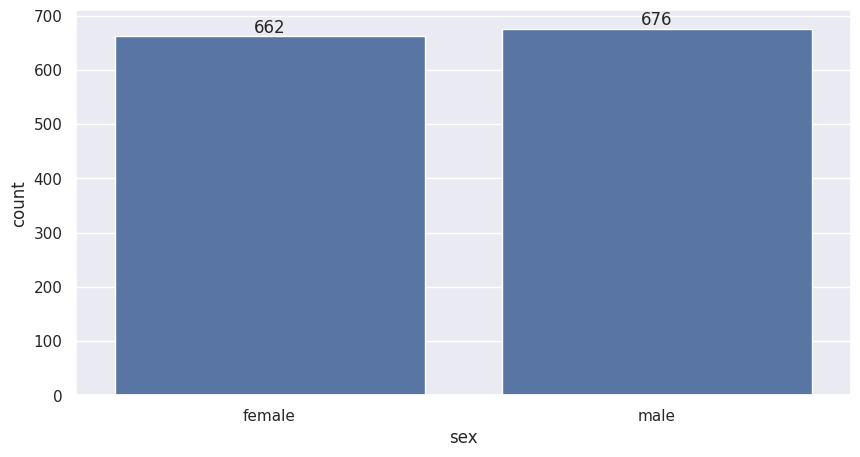

In [10]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='sex', data = dataset)
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
ax1.bar_label(ax1.containers[0])
plt.show()

***Using nested pie chart to show the ratio of smokers in different areas***

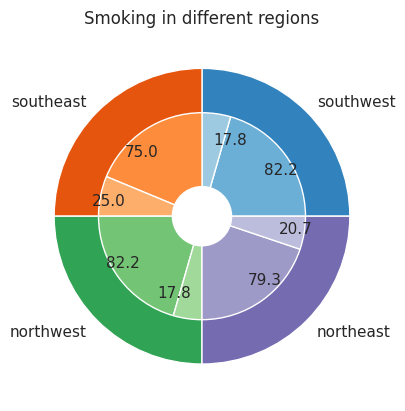

In [11]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([list(dataset.smoker[dataset.region == i].value_counts(normalize=True)) for i in list(dataset.region.unique())])

cmap = cmapl.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10, 13, 14])

labels_inner = [round(x,1) for x in 100*vals.flatten()]
labels_outer = list(dataset.region.unique())

# outer slices
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer)

# inner slices
ax.pie(vals.flatten(), radius=0.7, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, labeldistance=0.75)

ax.set(aspect="equal", title='Smoking in different regions')
# plt.legend(loc=(-0.6, 0))
plt.show()

<!-- #Using nested pie chart to show the ratio of Genders in different areas -->

***Using nested pie chart to show the ratio of Genders in different areas***

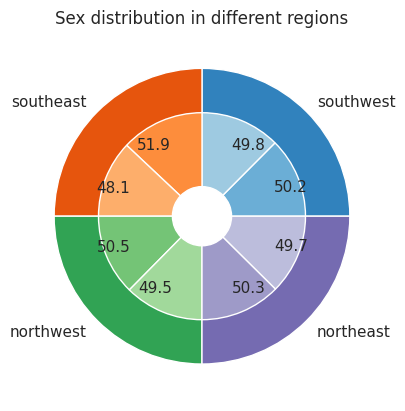

In [12]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([list(dataset.sex[dataset.region == i].value_counts(normalize=True)) for i in list(dataset.region.unique())])

cmap = cmapl.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10, 13, 14])

labels_inner = [round(x,1) for x in 100*vals.flatten()]
labels_outer = list(dataset.region.unique())

# outer slices
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer)

# inner slices
ax.pie(vals.flatten(), radius=0.7, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, labeldistance=0.75)

ax.set(aspect="equal", title='Sex distribution in different regions')
# plt.legend(loc=(-0.6, 0))
plt.show()

*Based on above charts data is not imbalanced toward any region or gender and the ratio of smokers to non-smokers is approximately same in all regions.*

***Now it is time to harness the potential of horizontal bar chart for comparing the ratio of smokers/non-smokers in differing areas***

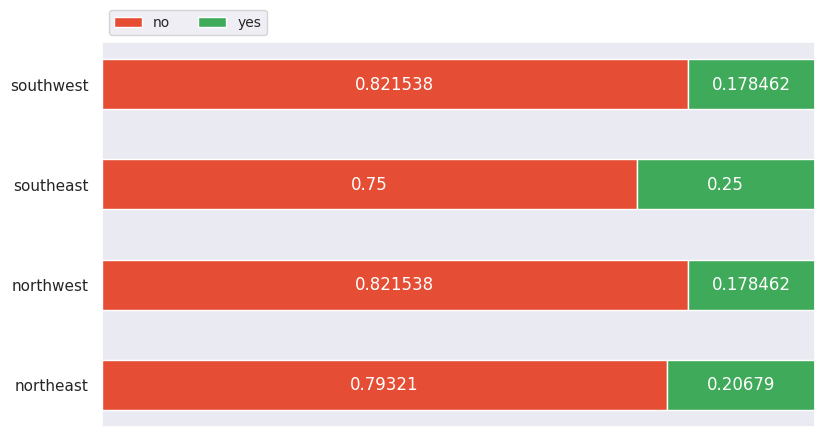

In [13]:

category_names = ['no','yes']
results = {i:list(dataset['smoker'][dataset.region ==i].value_counts(normalize=True)) for i in dataset.region.unique()}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

Based on the above charts southeast has the most ratio of smokers among all four areas.

**Medical Cost in four reigons:**

**Use jittered plots to avoid overlapping of points:**

---


A jitter plot represents data points in the form of single dots, in a similar manner to a scatter plot. The difference is that the jitter plot helps visualize the relationship between a measurement variable and a categorical variable. It is quite useful to evaluate the spread of the data within groups, and has the advantage of showing a lot of data points, without risking massive overlap (overplotting) and thus lack of clarity.
https://biostats.w.uib.no/creating-a-jitter-plot/

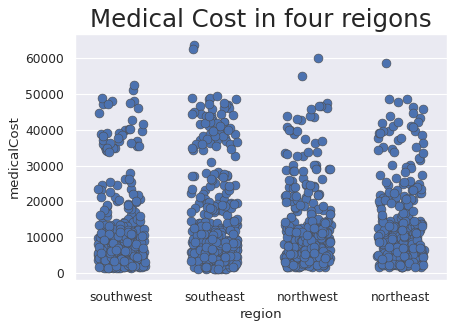

Average of medical cost in: {'southwest': 12346.937377292308, 'southeast': 14735.41143760989, 'northwest': 12417.57537396923, 'northeast': 13406.384516385802}
Sum of medical cost in: {'southwest': 4012754.647620001, 'southeast': 5363689.763290002, 'northwest': 4035711.9965399993, 'northeast': 4343668.583308999}


In [14]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(dataset, x = dataset['region'], y =dataset['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical Cost in four reigons', fontsize=22)
plt.show()
ave = {i:mean(dataset.medicalCost[dataset.region == i]) for i in dataset.region.unique()}
print(f'Average of medical cost in: {ave}')

total = {i:sum(dataset.medicalCost[dataset.region == i]) for i in dataset.region.unique()}
print(f'Sum of medical cost in: {total}')

**As it can be observed in southeast region where ciggarette rate is higher average medical cost is higher as well**

*To be more accurate let's scrutinize different areas' smoking rate for people with medicalCost more than 30000*

In [15]:
dataset[(dataset.region == 'southeast')&(dataset.medicalCost > 30000)].smoker.value_counts(normalize = True)

smoker
yes    0.983607
no     0.016393
Name: proportion, dtype: float64

In [16]:
dataset[(dataset.region == 'southwest')&(dataset.medicalCost > 30000)].smoker.value_counts(normalize = True)

smoker
yes    0.945946
no     0.054054
Name: proportion, dtype: float64

In [17]:
dataset[(dataset.region == 'northeast')&(dataset.medicalCost > 30000)].smoker.value_counts(normalize = True)

smoker
yes    0.914286
no     0.085714
Name: proportion, dtype: float64

In [18]:
dataset[(dataset.region == 'northwest')&(dataset.medicalCost > 30000)].smoker.value_counts(normalize = True)

smoker
yes    0.862069
no     0.137931
Name: proportion, dtype: float64

**Based on results it is obvious that the higher amount of medical costs in southeast may significantly be due to high rate of smoking in this area**

Now, let's explore more in Data:

***Relation of age and medical cost***

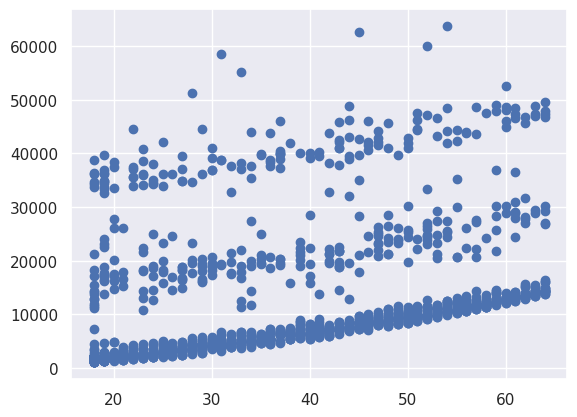

In [19]:
plt.scatter(dataset['age'],dataset['medicalCost'])
plt.show()

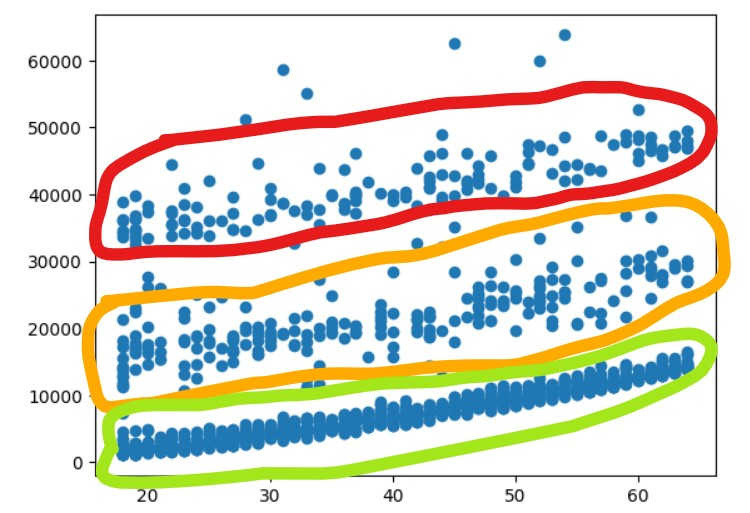

**Based on above plot there is an approximate ascending relation between "age" and "medicalCost" but this data is segmented based on a special feature that might be different amount of smoking rate among these three clusters.
Let's dig deeper in it a little bit:**

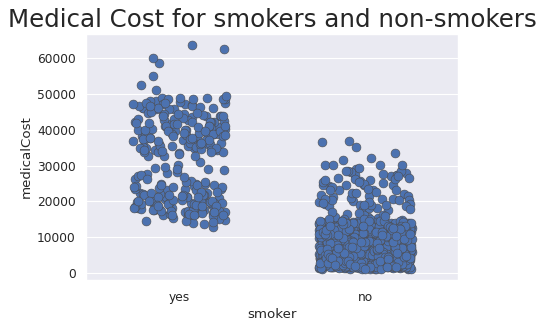

Mean of medical cost in smokers and non-smokers: {'yes': 32050.23183153285, 'no': 8434.268297856202}


In [20]:
# ploting medical cost for smokers and non-smokers with a jittered plot

# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(dataset, x = dataset['smoker'], y =dataset['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical Cost for smokers and non-smokers', fontsize=22)
plt.show()

ave = {i:mean(dataset.medicalCost[dataset.smoker == i]) for i in dataset.smoker.unique()}
print(f'Mean of medical cost in smokers and non-smokers: {ave}')

*It is clearly shown both in plot and average medical cost that smokers have more medicalCost*

*So this worth to split data to different medicalcost levels and see the distribution of smokers Vs. non-smokers*

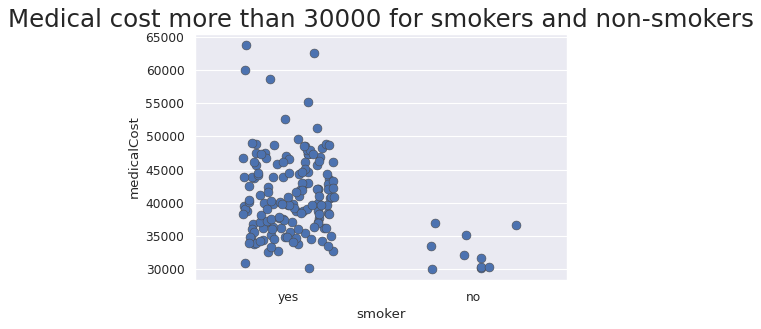

In [21]:
#Jittered plot for smokers and non-smokers with more than 30000 of medical cost

# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(dataset, x = dataset[dataset.medicalCost>30000]['smoker'], y =dataset[dataset.medicalCost>30000]['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical cost more than 30000 for smokers and non-smokers', fontsize=22)
plt.show()

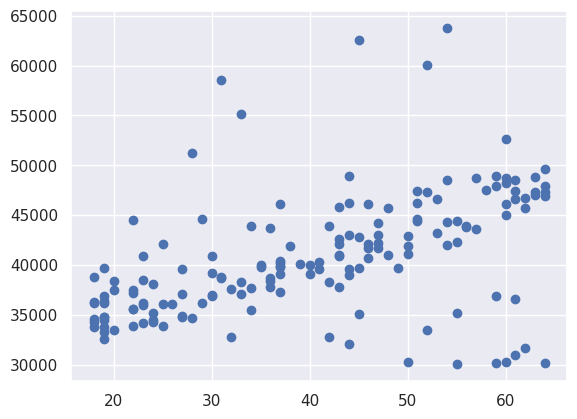

In [22]:
# Scatter plot of medical cost vs age for data with medicalcost for more than 30000

plt.scatter(dataset[dataset['medicalCost']>30000]['age'],dataset[dataset['medicalCost']>30000]['medicalCost'])
plt.show()

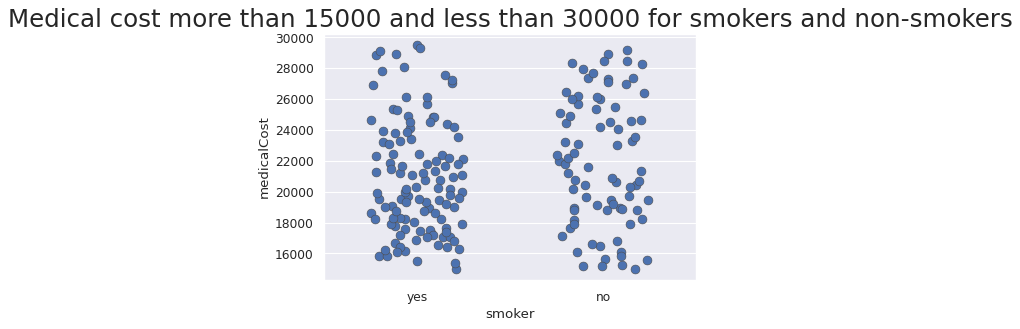

In [23]:
#Jittered plot for smokers and non-smokers with more than 15000 of medical cost and less than 30000 of medical cost

# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(dataset, x = dataset[(dataset.medicalCost<30000)&(dataset.medicalCost>15000)]['smoker'], y = dataset[(dataset.medicalCost<30000)&(dataset.medicalCost>15000)]['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical cost more than 15000 and less than 30000 for smokers and non-smokers', fontsize=22)
plt.show()

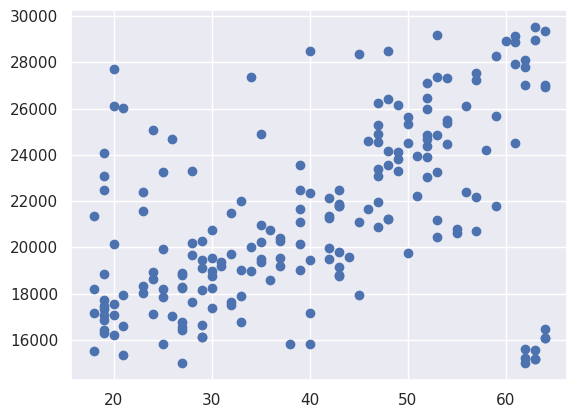

In [24]:
# Scatter plot of medical cost vs age for data with medicalcost for between 15000 and 30000

plt.scatter(dataset[(dataset['medicalCost']>15000)&(dataset['medicalCost']<30000)]['age'],dataset[(dataset['medicalCost']>15000)&(dataset['medicalCost']<30000)]['medicalCost'])
plt.show()

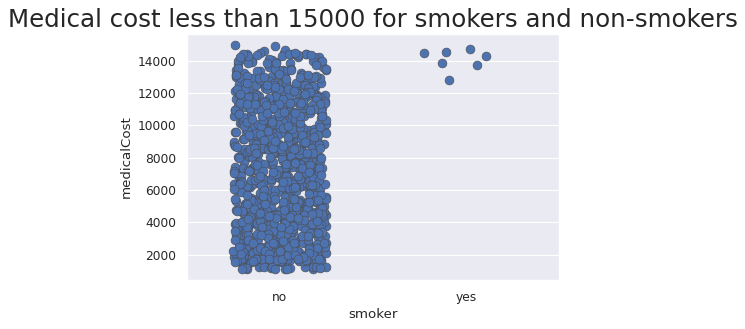

In [25]:
#Jittered plot for smokers and non-smokers with less than 15000 of medical cost

# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(dataset, x = dataset[dataset.medicalCost<15000]['smoker'], y = dataset[dataset.medicalCost<15000]['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical cost less than 15000 for smokers and non-smokers', fontsize=22)
plt.show()

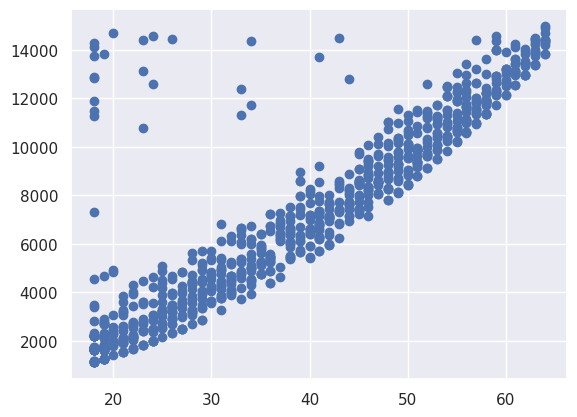

In [26]:
# Scatter plot of medical cost vs age for data with medicalcost for less than 15000

plt.scatter(dataset[dataset['medicalCost']<15000]['age'],dataset[dataset['medicalCost']<15000]['medicalCost'])
plt.show()

**So if we want to analyze the relation of age and medicalCost it is better to analyze it by intermediating role of smoking feature which results in different clusters of medical cost(three linear regression for three clusters seperately sounds logical)**

In [27]:
data = pd.read_csv('insurance.csv')

**Creating two new columns for Age_group and bmi_range to explore about different age groups and bmi ranges**

In [28]:
#calculating the interval for grouping the data
interval = round((max(data.bmi)-min(data.bmi))/5)

print(f'the interval for grouping is {interval}')

the interval for grouping is 7


In [29]:
max(data.bmi),min(data.bmi)

(53.13, 15.96)

In [30]:
# create a list of our conditions

bmi_condition = []
a = 15
while a>=15 and a<54:
  if a + interval > 54:
    q = (data.bmi > a) & (data.bmi <= 54)
  else:
    q = (data.bmi > a) & (data.bmi <= a + interval)
  bmi_condition.append(q)
  a += interval
# create a list of the values we want to assign for each condition
bmi_values = [1, 2, 3, 4, 5, 6]

# create a new column and use np.select to assign values to it using our lists as arguments
data['bmi_range'] = np.select(bmi_condition, bmi_values)

# display updated DataFrame
data.head()

,age,sex,bmi,children,smoker,region,medicalCost,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,2
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


In [31]:
df = data.copy()

In [32]:
#calculating the interval for grouping the data
interval = round((max(df.age)-min(df.age))/9)

print(f'the interval for age grouping is {interval}')

the interval for age grouping is 5


In [33]:
(max(df.age),min(df.age))

(64, 18)

In [34]:
# create a list of our conditions
age_condition = []
a = 17
while a>=17 and a<64:
  if a + interval > 64:
    q = (df.age > a) & (df.age <= 64)
  else:
    q = (df.age > a) & (df.age <= a + interval)
  age_condition.append(q)
  a += interval

# create a list of the values we want to assign for each condition
age_value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_group'] = np.select(age_condition, age_value)

# # display updated DataFrame
df.head()

,age,sex,bmi,children,smoker,region,medicalCost,bmi_range,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,2,1
1,18,male,33.770,1,no,southeast,1725.55230,3,1
2,28,male,33.000,3,no,southeast,4449.46200,3,3
3,33,male,22.705,0,no,northwest,21984.47061,2,4
4,32,male,28.880,0,no,northwest,3866.85520,2,3


In [35]:
# Arranging the columns
column = ['age', 'age_group', 'sex', 'bmi', 'bmi_range', 'children', 'smoker', 'region', 'medicalCost']
df = df[column]

In [36]:
df.head()

,age,age_group,sex,bmi,bmi_range,children,smoker,region,medicalCost
0,19,1,female,27.900,2,0,yes,southwest,16884.92400
1,18,1,male,33.770,3,1,no,southeast,1725.55230
2,28,3,male,33.000,3,3,no,southeast,4449.46200
3,33,4,male,22.705,2,0,no,northwest,21984.47061
4,32,3,male,28.880,2,0,no,northwest,3866.85520


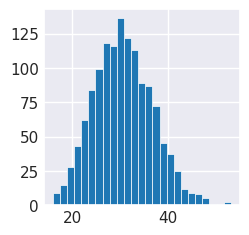

In [37]:
#bmi_distribution
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = data['bmi']

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=25, linewidth=0.5, edgecolor="white")

plt.show()

Based on this histogram BMI has a normal distribution.

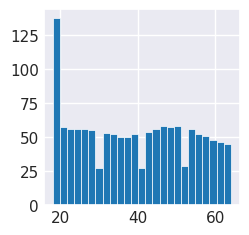

In [38]:
#age distribution
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = data['age']

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins = 25, linewidth=0.5, edgecolor="white")

plt.show()

Age feature has a right skewness.

In [39]:
df.head()

,age,age_group,sex,bmi,bmi_range,children,smoker,region,medicalCost
0,19,1,female,27.900,2,0,yes,southwest,16884.92400
1,18,1,male,33.770,3,1,no,southeast,1725.55230
2,28,3,male,33.000,3,3,no,southeast,4449.46200
3,33,4,male,22.705,2,0,no,northwest,21984.47061
4,32,3,male,28.880,2,0,no,northwest,3866.85520


In [40]:
df.bmi_range.unique()

array([2, 3, 4, 1, 5, 6])

In [41]:
df.bmi_range.value_counts(sort = False)

bmi_range
2    463
3    521
4    223
1     97
5     31
6      3
Name: count, dtype: int64

In [42]:
import matplotlib as mpl

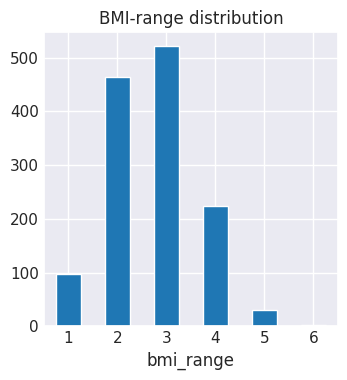

In [43]:
#bar chart for bmi_range distribution

df['bmi_range'].value_counts().sort_index().plot(kind='bar',title='BMI-range distribution', figsize =(3,3), rot = 0)
plt.show()

Most of people have a BMI in 3rd range which is approximately between 67 and 74.

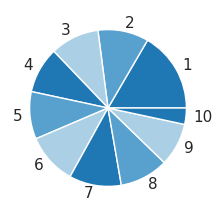

In [44]:
#pie chart for age_group distribution
labels = '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'
sizes = list(df.age_group.value_counts().sort_index())

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

In [45]:
df['bmi_range'] = df['bmi_range'].astype(str)

**Scrutinizing smoking in various age groups**

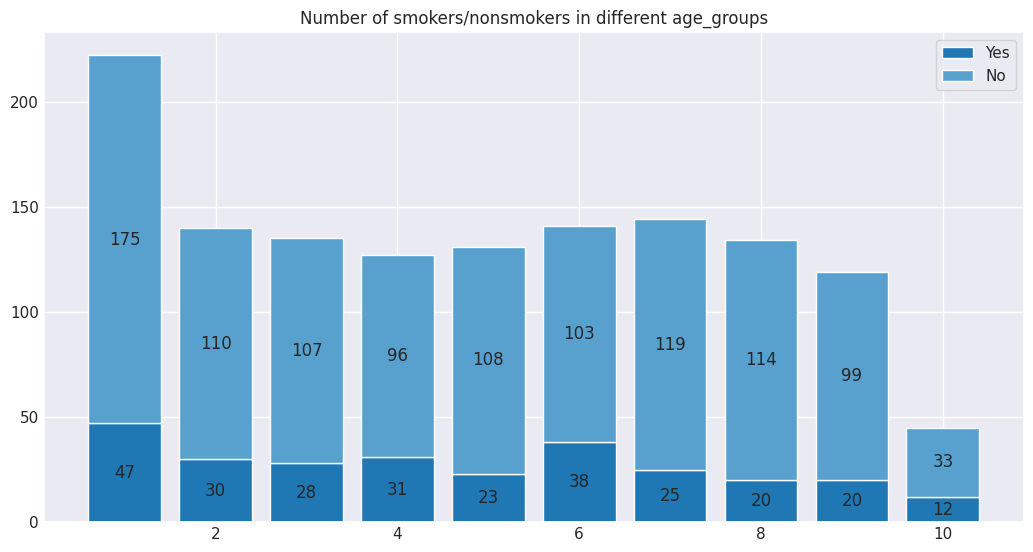

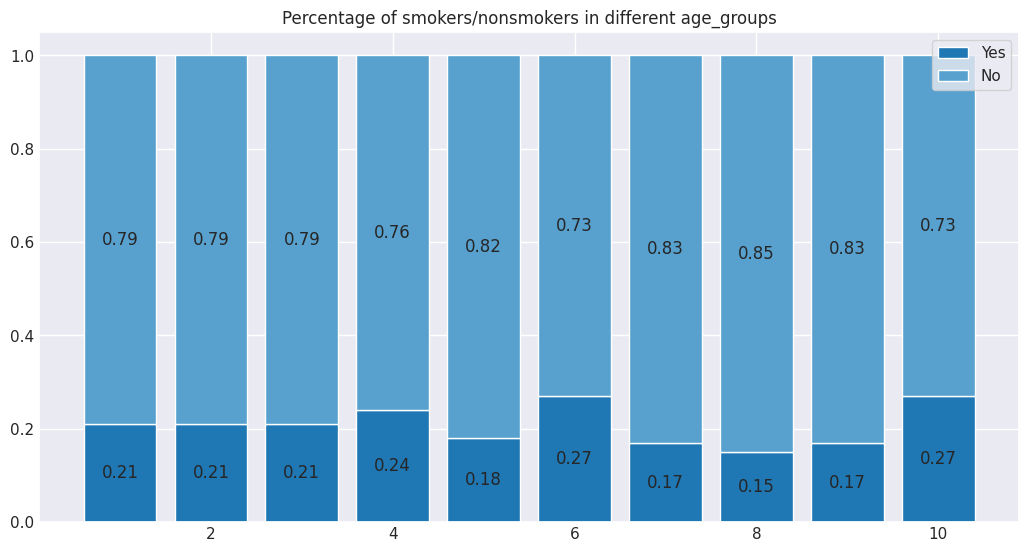

In [46]:
q = {i:list(df[df['age_group'] == i]['smoker'].value_counts()) for i in sorted(df.age_group.unique())}
r = {i:list(df[df['age_group'] == i]['smoker'].value_counts(normalize = True)) for i in sorted(df.age_group.unique())}
a = 0
yes = []
no = []
for i in q.values():
  for j in i:
    a += 1
    j = round(j,2)
    if a%2 == 0:
      yes.append(j)
    else:
      no.append(j)
species = tuple(sorted(list(df['age_group'].unique())))
sex_counts = {
    'Yes': np.array(yes),
    'No': np.array(no),
}
width =0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10,5))
bottom = np.zeros(10)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of smokers/nonsmokers in different age_groups')
ax.legend()

plt.show()
a = 0
yes = []
no = []
for i in r.values():
  for j in i:
    a += 1
    j = round(j,2)
    if a%2 == 0:
      yes.append(j)
    else:
      no.append(j)

species = tuple(sorted(list(df['age_group'].unique())))
sex_counts = {
    'Yes': np.array(yes),
    'No': np.array(no),
}
width =0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10,5))
bottom = np.zeros(10)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Percentage of smokers/nonsmokers in different age_groups')
ax.legend()

plt.show()

Based on these charts the most rate of smoking is among people in 6th age group which is 42 to 47 years old.

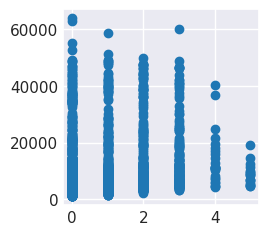

In [47]:
plt.scatter(df['children'],df['medicalCost'])
plt.show()

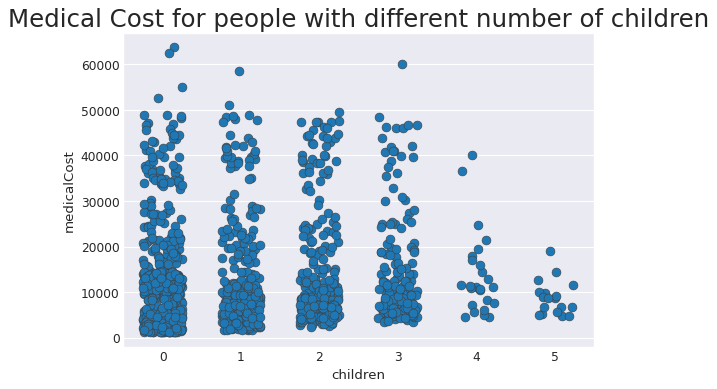

In [48]:
#Use jittered plots to avoid overlapping of points


# Draw Stripplot
fig, ax = plt.subplots(figsize=(6,4), dpi= 80)
sns.stripplot(data, x = data['children'], y =data['medicalCost'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Medical Cost for people with different number of children', fontsize=22)
plt.show()

In [49]:
# ave = {i:mean(data.medicalCost[data.children == i]) for i in data.children.unique()}
ave  = [print(f'{i} childs are covered by insurance: Avg medical cost = {round(mean(df.medicalCost[data.children == i]),2)}, Max of medical cost = {round(max(df.medicalCost[data.children == i]),2)}') for i in sorted(df.children.unique())]


0 childs are covered by insurance: Avg medical cost = 12365.98, Max of medical cost = 63770.43
1 childs are covered by insurance: Avg medical cost = 12731.17, Max of medical cost = 58571.07
2 childs are covered by insurance: Avg medical cost = 15073.56, Max of medical cost = 49577.66
3 childs are covered by insurance: Avg medical cost = 15355.32, Max of medical cost = 60021.4
4 childs are covered by insurance: Avg medical cost = 13850.66, Max of medical cost = 40182.25
5 childs are covered by insurance: Avg medical cost = 8786.04, Max of medical cost = 19023.26


In [50]:
u = pd.pivot_table(df, values='medicalCost', index=['children'],
               aggfunc=np.mean)

In [51]:
u['Maximum'] = pd.pivot_table(df, values='medicalCost', index=['children'],
               aggfunc=np.max)

In [52]:
u['Count'] = df.children.value_counts()

In [53]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [54]:
u.columns = ['Mean' , 'Maximum', 'Count']

In [55]:
u

,Mean,Maximum,Count
children,,,
0,12365.975602,63770.42801,574
1,12731.171832,58571.07448,324
2,15073.563734,49577.66240,240
3,15355.318367,60021.39897,157
4,13850.656311,40182.24600,25
5,8786.035247,19023.26000,18


<Axes: xlabel='children', ylabel='medicalCost'>

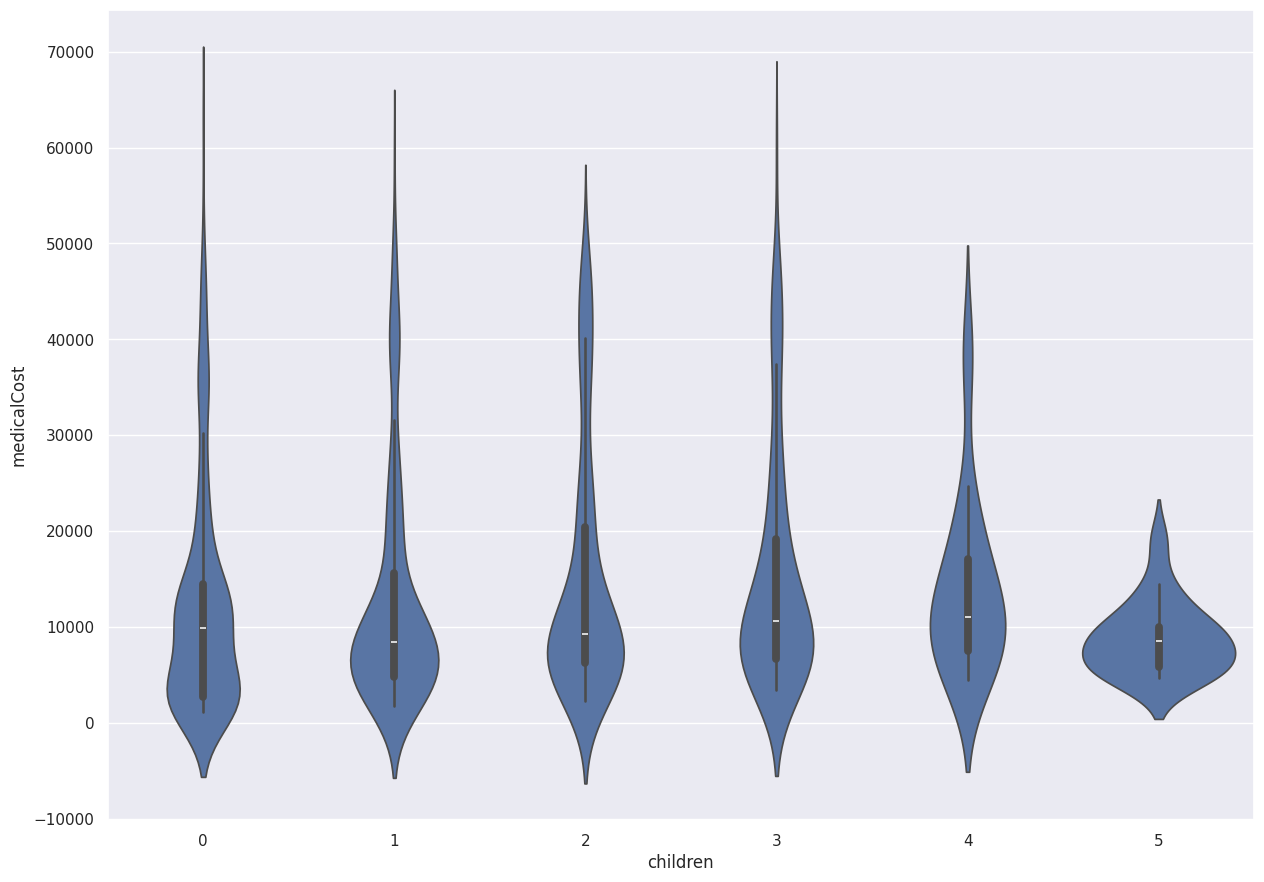

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df, x="children", y="medicalCost")

Number of children distribution in various regions by means of pandas cross tab

In [57]:
pd.crosstab(df.region, df.children)

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


### **Correlation Analysis**

**Since running dython is a little bit challenging in google colab, below the code has been run and then commented and the result is presented in image form.**

In [58]:
# !pip install dython

In [59]:
# from dython.nominal import associations

In [60]:
# # Step 1: Instantiate a figure and axis object
# fig, ax = plt.subplots(figsize=(16, 8))
# # Step 2: Creating a pair-wise correlation plot
# # Saving it into a variable(r)
# r = associations(dataset, ax = ax, cmap = "Blues")

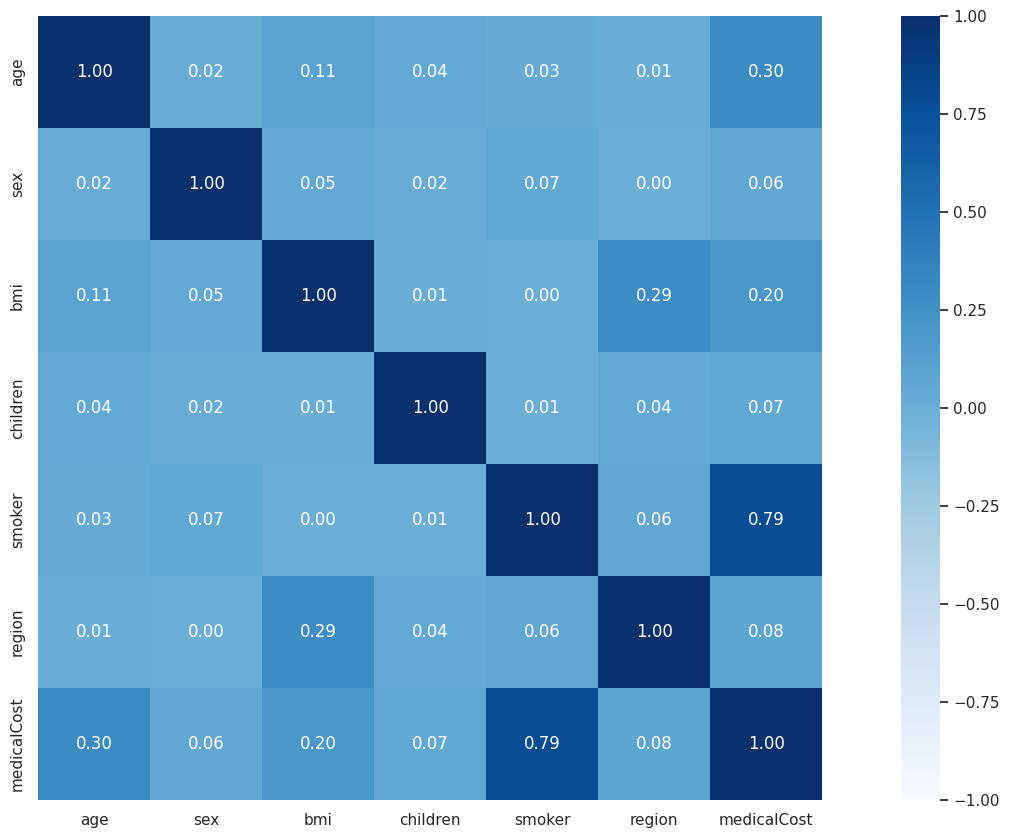

Question C answer:

---



---


**Based on the correlation matrix the most three effective features on costs are respectively, 'smoker', 'age', and 'bmi'**

In [61]:
df.head()

,age,age_group,sex,bmi,bmi_range,children,smoker,region,medicalCost
0,19,1,female,27.900,2,0,yes,southwest,16884.92400
1,18,1,male,33.770,3,1,no,southeast,1725.55230
2,28,3,male,33.000,3,3,no,southeast,4449.46200
3,33,4,male,22.705,2,0,no,northwest,21984.47061
4,32,3,male,28.880,2,0,no,northwest,3866.85520


## **Machine Learning**

First question answer:

---


**As far as in this dataset, there are some target values for data, the approach that should be taken is supervised learning**

In [62]:
comparr = pd.DataFrame(columns = ['r2_score', 'MAE', 'MSE', 'RMSE'])
def metric(y_test,y_pred):
  return [r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred))]

### ***Smoker Vs. medical cost***

***Linear regression for smoker feature as independent variable and medical cost as dependant target variable***

In [63]:
x = pd.get_dummies(dataset[['smoker']],drop_first= True)
y =dataset.medicalCost

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [64]:
x_train.shape,x_test.shape

((1070, 1), (268, 1))

In [65]:
lr = LinearRegression().fit(x_train,y_train)

y_pred = lr.predict(x_test)


In [66]:
comparr.loc['smoker_alone'] = metric(y_test,y_pred)

In [67]:
comparr

,r2_score,MAE,MSE,RMSE
smoker_alone,0.673429,5510.907974,5.196719e+07,7208.827056


### **Age Vs. Medical Cost**

***Linear regression for age feature as independent variable and medical cost as dependant target variable***

In [68]:
x = dataset[['age']]
y =dataset.medicalCost

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((1070, 1), (268, 1))

In [69]:
lr = LinearRegression().fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [70]:
comparr.loc['age_alone'] = metric(y_test,y_pred)

### **BMI Vs. Medical Cost**

***Linear regression for BMI feature as independent variable and medical cost as dependant target variable***

In [71]:
x = dataset[['bmi']]
y =dataset.medicalCost

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((1070, 1), (268, 1))

In [72]:
lr = LinearRegression().fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [73]:
comparr.loc['bmi'] = metric(y_test,y_pred)

### **Smoker, Age & BMI Vs. Medical Cost**

***Multivariate Linear regression for smoker, age and BMI features as independent variables and medical cost as dependant target variable***

In [74]:
x = pd.get_dummies(dataset[['smoker','age','bmi']])
y =dataset.medicalCost

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((1070, 4), (268, 4))

In [75]:
lr = LinearRegression().fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [76]:
comparr.loc['Smoker, Age & BMI'] = metric(y_test,y_pred)

### **All features Vs. Medical cost**

***Multivariate Linear regression for all features as independent variables and medical cost as dependant target variable***

In [77]:
x = pd.get_dummies(dataset.drop('medicalCost',axis = 1))
y =dataset.medicalCost

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((1070, 11), (268, 11))

In [78]:
lr = LinearRegression().fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [79]:
comparr.loc['All Features'] = metric(y_test,y_pred)

## **Conclusion**

In [80]:
comparr

,r2_score,MAE,MSE,RMSE
smoker_alone,0.673429,5510.907974,5.196719e+07,7208.827056
age_alone,0.125391,9147.177403,1.391765e+08,11797.307532
bmi,0.056089,9276.717030,1.502045e+08,12255.796504
"Smoker, Age & BMI",0.794550,3960.866620,3.269324e+07,5717.800096
All Features,0.799988,3933.272649,3.182795e+07,5641.626559


***Based on above table, obviously, the best set of the features to take into account are all features which resulted in the most score for regression which can predict around 0.8 percent of target variable variance. However, the slight difference between the performance of three most correlated variables and all variables in tandem explains that if this dataset was a considerable voluminous data, it would be better to do the feature scaling to decrease the process time while maintaining approximately same performance.***